# 1. Data processing

In [2]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
results = pd.read_csv("results1.csv")
results

,resultId,raceId,driverId,constructorId,number,grid,positionOrder,points,laps,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,10.0,58,5690616,39,2,01:27.5,218.300,1
1,2,18,2,2,3,5,2,8.0,58,5696094,41,3,01:27.7,217.586,1
2,3,18,3,3,7,7,3,6.0,58,5698779,41,5,01:28.1,216.719,1
3,4,18,4,4,5,11,4,5.0,58,5707797,58,7,01:28.6,215.464,1
4,5,18,5,1,23,3,5,4.0,58,5708630,43,1,01:27.4,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3291,25130,1060,832,6,55,10,5,10.0,71,5091687,70,2,01:07.8,229.402,1
3292,25131,1060,815,9,11,3,6,8.0,71,5092458,55,5,01:08.2,227.956,1
3293,25132,1060,817,1,3,13,7,6.0,71,5094938,56,14,01:08.8,225.876,1
3294,25133,1060,844,6,16,12,8,4.0,71,5095738,55,13,01:08.7,226.277,1


In [4]:
driver_st = pd.read_csv('driver_standings.csv')
driver_st

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0
...,...,...,...,...,...,...,...
33120,70463,1060,839,12.0,13,13,0
33121,70462,1060,841,1.0,16,16,0
33122,70459,1060,852,9.0,14,14,0
33123,70457,1060,817,40.0,8,8,0


In [5]:
#Drop the column with the same meanings and useless for the business problem
results_drop = results.drop(['statusId','number','resultId','fastestLapTime'],axis = 1)
results_drop

,raceId,driverId,constructorId,grid,positionOrder,points,laps,milliseconds,fastestLap,rank,fastestLapSpeed
0,18,1,1,1,1,10.0,58,5690616,39,2,218.300
1,18,2,2,5,2,8.0,58,5696094,41,3,217.586
2,18,3,3,7,3,6.0,58,5698779,41,5,216.719
3,18,4,4,11,4,5.0,58,5707797,58,7,215.464
4,18,5,1,3,5,4.0,58,5708630,43,1,218.385
...,...,...,...,...,...,...,...,...,...,...,...
3291,1060,832,6,10,5,10.0,71,5091687,70,2,229.402
3292,1060,815,9,3,6,8.0,71,5092458,55,5,227.956
3293,1060,817,1,13,7,6.0,71,5094938,56,14,225.876
3294,1060,844,6,12,8,4.0,71,5095738,55,13,226.277


In [6]:
driversresult_merge = pd.merge(driver_st, results_drop, how = 'inner',left_on = ['driverId','raceId'],right_on = ['driverId','raceId'])
driversresult_merge

,driverStandingsId,raceId,driverId,points_x,position,positionText,wins,constructorId,grid,positionOrder,points_y,laps,milliseconds,fastestLap,rank,fastestLapSpeed
0,1,18,1,10.0,1,1,1,1,1,1,10.0,58,5690616,39,2,218.300
1,2,18,2,8.0,2,2,0,2,5,2,8.0,58,5696094,41,3,217.586
2,3,18,3,6.0,3,3,0,3,7,3,6.0,58,5698779,41,5,216.719
3,4,18,4,5.0,4,4,0,4,11,4,5.0,58,5707797,58,7,215.464
4,5,18,5,4.0,5,5,0,1,3,5,4.0,58,5708630,43,1,218.385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3289,70454,1060,846,101.0,4,4,0,1,2,3,15.0,71,5054562,62,10,227.027
3290,70452,1060,830,182.0,1,1,5,9,1,1,26.0,71,5034543,62,1,234.815
3291,70453,1060,822,92.0,5,5,0,131,5,2,18.0,71,5052516,52,6,227.349
3292,70457,1060,817,40.0,8,8,0,1,13,7,6.0,71,5094938,56,14,225.876


In [7]:
driversresult_merge_drop = driversresult_merge.drop(['points_x','driverStandingsId','positionText'], axis = 1)
driversresult_merge_drop

,raceId,driverId,position,wins,constructorId,grid,positionOrder,points_y,laps,milliseconds,fastestLap,rank,fastestLapSpeed
0,18,1,1,1,1,1,1,10.0,58,5690616,39,2,218.300
1,18,2,2,0,2,5,2,8.0,58,5696094,41,3,217.586
2,18,3,3,0,3,7,3,6.0,58,5698779,41,5,216.719
3,18,4,4,0,4,11,4,5.0,58,5707797,58,7,215.464
4,18,5,5,0,1,3,5,4.0,58,5708630,43,1,218.385
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3289,1060,846,4,0,1,2,3,15.0,71,5054562,62,10,227.027
3290,1060,830,1,5,9,1,1,26.0,71,5034543,62,1,234.815
3291,1060,822,5,0,131,5,2,18.0,71,5052516,52,6,227.349
3292,1060,817,8,0,1,13,7,6.0,71,5094938,56,14,225.876


In [8]:
drivers = pd.read_csv("drivers.csv")
drivers

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
...,...,...,...,...,...,...,...,...,...
848,850,pietro_fittipaldi,51,FIT,Pietro,Fittipaldi,1996-06-25,Brazilian,http://en.wikipedia.org/wiki/Pietro_Fittipaldi
849,851,aitken,89,AIT,Jack,Aitken,1995-09-23,British,http://en.wikipedia.org/wiki/Jack_Aitken
850,852,tsunoda,22,TSU,Yuki,Tsunoda,2000-05-11,Japanese,http://en.wikipedia.org/wiki/Yuki_Tsunoda
851,853,mazepin,9,MAZ,Nikita,Mazepin,1999-03-02,Russian,http://en.wikipedia.org/wiki/Nikita_Mazepin


In [9]:
drivers_drop = drivers.drop(['number','code','forename','surname','dob','driverRef'],axis = 1)
drivers_drop

,driverId,nationality,url
0,1,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
...,...,...,...
848,850,Brazilian,http://en.wikipedia.org/wiki/Pietro_Fittipaldi
849,851,British,http://en.wikipedia.org/wiki/Jack_Aitken
850,852,Japanese,http://en.wikipedia.org/wiki/Yuki_Tsunoda
851,853,Russian,http://en.wikipedia.org/wiki/Nikita_Mazepin


In [10]:
dr_result_nation = pd.merge(drivers_drop, driversresult_merge_drop, on = ['driverId'])
dr_result_nation

,driverId,nationality,url,raceId,position,wins,constructorId,grid,positionOrder,points_y,laps,milliseconds,fastestLap,rank,fastestLapSpeed
0,1,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,18,1,1,1,1,1,10.0,58,5690616,39,2,218.300
1,1,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,19,1,1,1,9,5,4.0,56,5525103,53,3,209.033
2,1,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,21,2,1,1,5,3,6.0,66,5903238,20,3,204.323
3,1,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,22,3,1,1,3,2,8.0,58,5213230,31,2,222.085
4,1,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,23,1,2,1,3,1,10.0,76,7242742,71,6,153.152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3289,852,Japanese,http://en.wikipedia.org/wiki/Yuki_Tsunoda,1052,9,0,213,13,9,2.0,56,5609589,38,8,205.603
3290,852,Japanese,http://en.wikipedia.org/wiki/Yuki_Tsunoda,1053,11,0,213,20,12,0.0,63,7427782,49,4,225.603
3291,852,Japanese,http://en.wikipedia.org/wiki/Yuki_Tsunoda,1057,14,0,213,7,7,6.0,51,8023034,46,5,205.936
3292,853,Russian,http://en.wikipedia.org/wiki/Nikita_Mazepin,1057,19,0,210,18,14,0.0,51,8030725,40,19,200.569


In [11]:
races = pd.read_csv("races.csv")
races

,raceId,year,round,circuitId,name,date,time,url
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...
...,...,...,...,...,...,...,...,...
1053,1069,2021,18,69,United States Grand Prix,2021-10-24,19:00:00,http://en.wikipedia.org/wiki/2021_United_State...
1054,1070,2021,19,32,Mexico City Grand Prix,2021-10-31,19:00:00,http://en.wikipedia.org/wiki/2021_Mexican_Gran...
1055,1071,2021,20,18,Brazilian Grand Prix,2021-11-07,17:00:00,http://en.wikipedia.org/wiki/2021_Brazilian_Gr...
1056,1072,2021,22,77,Saudi Arabian Grand Prix,2021-12-05,16:00:00,http://en.wikipedia.org/wiki/2021_Saudi_Arabia...


In [12]:
data = list(races.columns[2:])
races_drop = races.drop(data,axis = 1)
races_drop

,raceId,year
0,1,2009
1,2,2009
2,3,2009
3,4,2009
4,5,2009
...,...,...
1053,1069,2021
1054,1070,2021
1055,1071,2021
1056,1072,2021


In [13]:
races_results = pd.merge(races_drop, results, on = ['raceId'])
races_results

,raceId,year,resultId,driverId,constructorId,number,grid,positionOrder,points,laps,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,2009,7554,18,23,22,1,1,10.0,58,5655784,17,3,01:28.0,216.891,1
1,1,2009,7555,22,23,23,2,2,8.0,58,5656591,43,14,01:29.1,214.344,1
2,1,2009,7556,15,7,9,20,3,6.0,58,5657388,50,10,01:28.9,214.706,1
3,1,2009,7557,10,7,10,19,4,5.0,58,5660219,53,6,01:28.4,215.920,1
4,1,2009,7558,4,4,7,10,5,4.0,58,5660663,53,9,01:28.7,215.199,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3291,1060,2021,25130,832,6,55,10,5,10.0,71,5091687,70,2,01:07.8,229.402,1
3292,1060,2021,25131,815,9,11,3,6,8.0,71,5092458,55,5,01:08.2,227.956,1
3293,1060,2021,25132,817,1,3,13,7,6.0,71,5094938,56,14,01:08.8,225.876,1
3294,1060,2021,25133,844,6,16,12,8,4.0,71,5095738,55,13,01:08.7,226.277,1


In [37]:
nation_races = pd.merge(races_results, dr_result_nation, on = ['raceId'])
nation_races[['year','nationality','wins']]
wins_sum = nation_races.wins.sum()
wins_sum

28988

In [73]:
df = nation_races[['year','nationality','wins']].groupby(['year','nationality']).sum()
winratio = df.wins.values /  wins_sum
df['winratio'] = winratio
year_list = []
nationality_list = []
for i in df.index:
    year_list.append(i[0])
    nationality_list.append(i[1])
df['year'] = year_list
df['nationality'] = nationality_list
list1 = df.nationality.to_list()
list2 = list(set(list1))
list2
year = df.year.to_list()
nationality = df.nationality.to_list()
winratio_1 = df.winratio.to_list()

def data(l):
    list3 = []
    for y,n,w in zip(year,nationality,winratio_1):
        if n == l:
            list3.append([y,w,n])
    return list3

list4 = []
for l in list2:
    d = data(l)
    list4.append(d)
list4
            
    

[[[2005, 0.0, 'Canadian'],
  [2006, 0.0, 'Canadian'],
  [2017, 0.0, 'Canadian'],
  [2018, 0.0, 'Canadian'],
  [2019, 0.0, 'Canadian'],
  [2020, 0.0, 'Canadian'],
  [2021, 0.0, 'Canadian']],
 [[2004, 0.0, 'Japanese'],
  [2005, 0.0, 'Japanese'],
  [2007, 0.0, 'Japanese'],
  [2008, 0.0, 'Japanese'],
  [2009, 0.0, 'Japanese'],
  [2010, 0.0, 'Japanese'],
  [2011, 0.0, 'Japanese'],
  [2012, 0.0, 'Japanese'],
  [2014, 0.0, 'Japanese'],
  [2021, 0.0, 'Japanese']],
 [[2012, 0.0, 'Belgian'], [2017, 0.0, 'Belgian'], [2018, 0.0, 'Belgian']],
 [[2004, 0.001966330895542983, 'Italian'],
  [2005, 0.0032082240927280253, 'Italian'],
  [2006, 0.004484614323168208, 'Italian'],
  [2007, 0.0, 'Italian'],
  [2008, 0.0, 'Italian'],
  [2009, 0.0, 'Italian'],
  [2010, 0.0, 'Italian'],
  [2011, 0.0, 'Italian'],
  [2019, 0.0, 'Italian'],
  [2020, 0.0, 'Italian'],
  [2021, 0.0, 'Italian']],
 [[2014, 0.0, 'Swedish'],
  [2015, 0.0, 'Swedish'],
  [2017, 0.0, 'Swedish'],
  [2018, 0.0, 'Swedish']],
 [[2006, 0.0, 'Polis

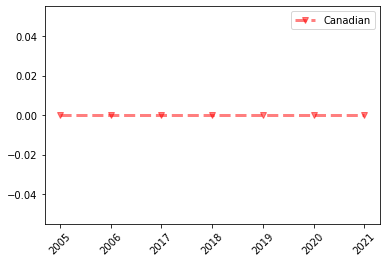

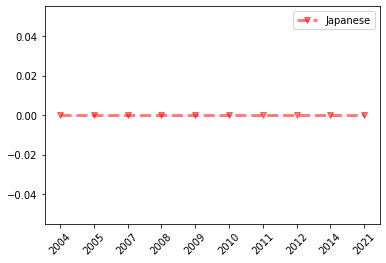

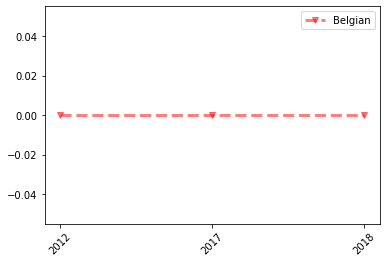

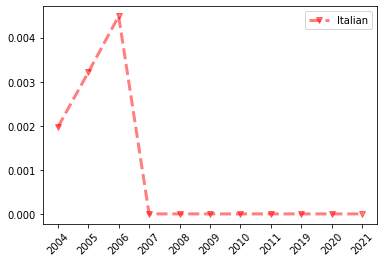

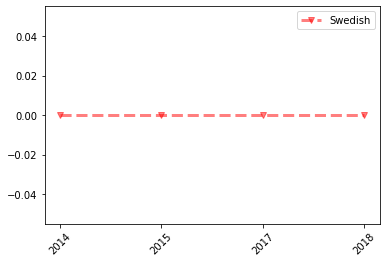

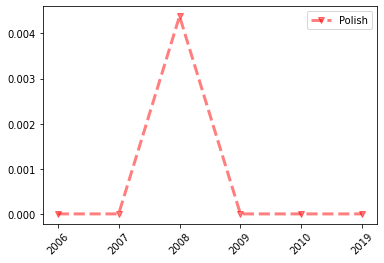

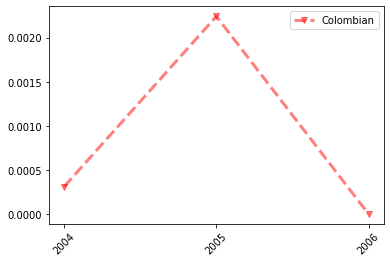

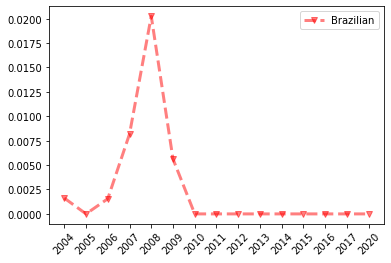

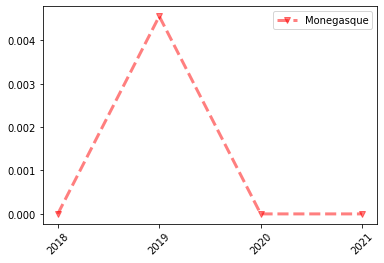

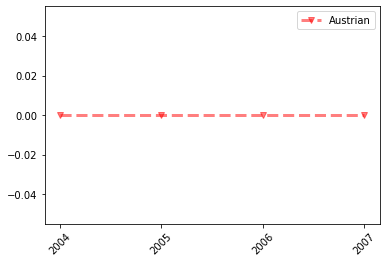

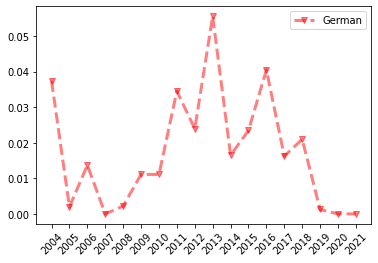

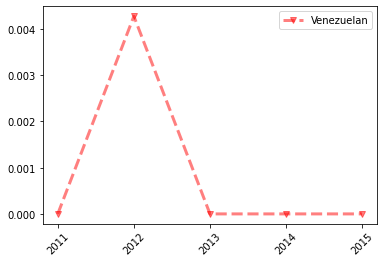

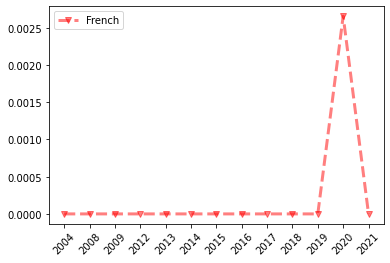

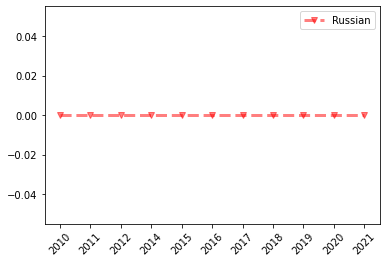

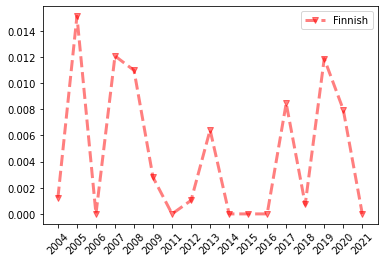

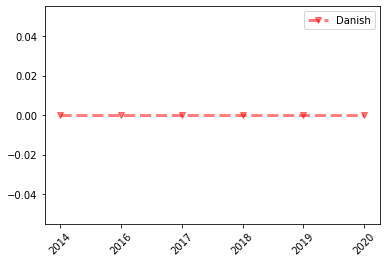

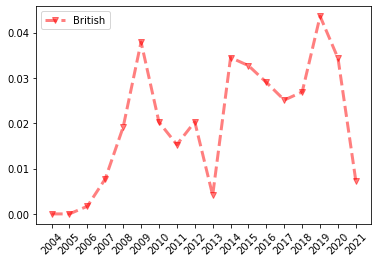

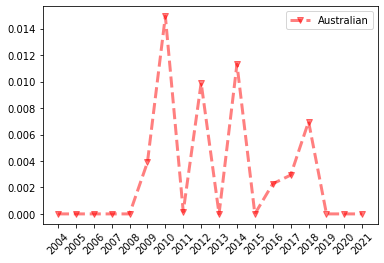

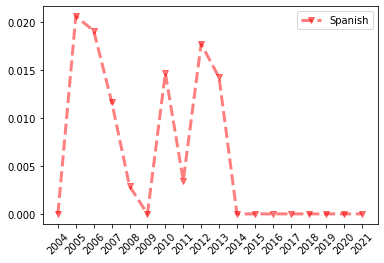

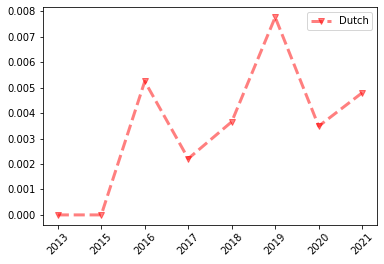

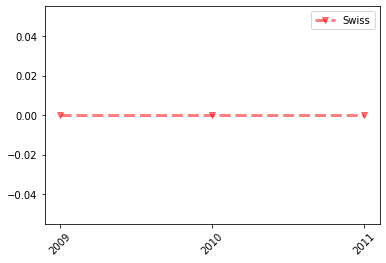

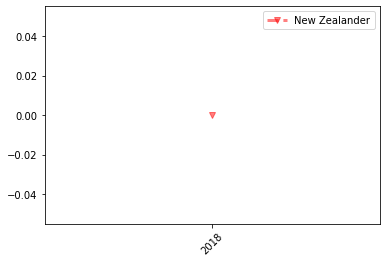

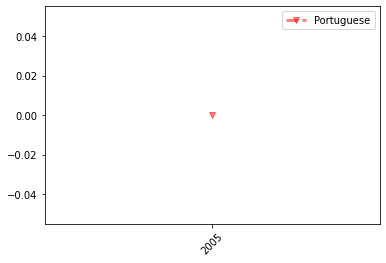

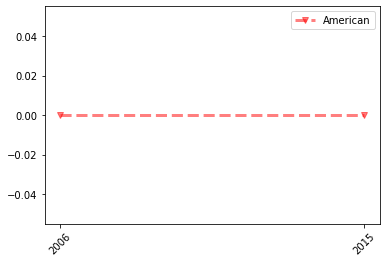

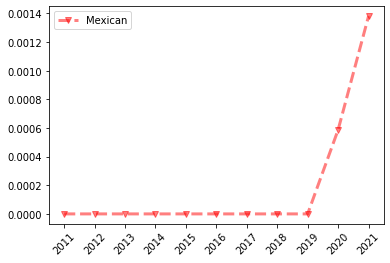

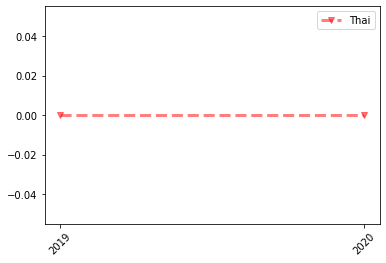

In [100]:
import matplotlib.pyplot as plt
import numpy as np
y = np.arange(2004,2022)

for l in list4:
    year = []
    nationality = []
    win_ratio = []
    for i in l:
        year.append(str(i[0]))
        win_ratio.append(i[1])
        nationality.append(i[2])
        
    plt.plot(year,win_ratio,color= 'red',alpha = 0.5,linestyle='--',linewidth=3,marker='v',label='{}'.format(list(set(nationality))[0]))
    plt.legend()
    plt.xticks(rotation=45)
#     plt.ylim(list(y)
    plt.show()

# 2. Data visualization

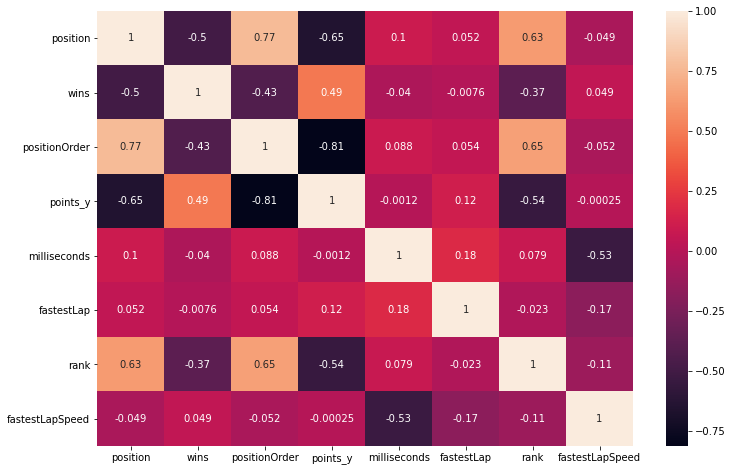

In [32]:
plt.figure(figsize = (12,8))
sns.heatmap (dr_result_nation.corr(method = 'pearson').drop(
    ['driverId','raceId','constructorId','grid','laps'],axis = 1).drop(
    ['driverId','raceId','constructorId','grid','laps'], axis = 0), annot = True)
plt.show()

In [102]:
qualifying = pd.read_csv('qualifying.csv')
qualifying

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236
...,...,...,...,...,...,...,...,...,...
8868,8909,1060,8,51,7,16,1:05.009,\N,\N
8869,8910,1060,839,214,31,17,1:05.051,\N,\N
8870,8911,1060,849,3,6,18,1:05.195,\N,\N
8871,8912,1060,854,210,47,19,1:05.427,\N,\N


In [121]:
nation_qualifying = pd.merge(dr_result_nation, qualifying, on = ['raceId'])
nation_qualifying

,driverId_x,nationality,url,raceId,position_x,wins,constructorId_x,grid,positionOrder,points_y,...,rank,fastestLapSpeed,qualifyId,driverId_y,constructorId_y,number,position_y,q1,q2,q3
0,1,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,18,1,1,1,1,1,10.0,...,2,218.300,1,1,1,22,1,1:26.572,1:25.187,1:26.714
1,1,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,18,1,1,1,1,1,10.0,...,2,218.300,2,9,2,4,2,1:26.103,1:25.315,1:26.869
2,1,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,18,1,1,1,1,1,10.0,...,2,218.300,3,5,1,23,3,1:25.664,1:25.452,1:27.079
3,1,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,18,1,1,1,1,1,10.0,...,2,218.300,4,13,6,2,4,1:25.994,1:25.691,1:27.178
4,1,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,18,1,1,1,1,1,10.0,...,2,218.300,5,2,2,3,5,1:25.960,1:25.518,1:27.236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70075,30,German,http://en.wikipedia.org/wiki/Michael_Schumacher,79,3,1,6,5,1,10.0,...,1,211.074,1194,14,9,14,16,1:12.682,\N,\N
70076,30,German,http://en.wikipedia.org/wiki/Michael_Schumacher,79,3,1,6,5,1,10.0,...,1,211.074,1195,33,17,18,17,1:13.462,\N,\N
70077,30,German,http://en.wikipedia.org/wiki/Michael_Schumacher,79,3,1,6,5,1,10.0,...,1,211.074,1196,27,18,21,18,1:13.632,\N,\N
70078,30,German,http://en.wikipedia.org/wiki/Michael_Schumacher,79,3,1,6,5,1,10.0,...,1,211.074,1197,39,17,19,19,1:13.776,\N,\N


In [108]:
nation_qualifying.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70080 entries, 0 to 70079
Data columns (total 23 columns):
driverId_x         70080 non-null int64
nationality        70080 non-null object
url                70080 non-null object
raceId             70080 non-null int64
position_x         70080 non-null int64
wins               70080 non-null int64
constructorId_x    70080 non-null int64
grid               70080 non-null int64
positionOrder      70080 non-null int64
points_y           70080 non-null float64
laps               70080 non-null int64
milliseconds       70080 non-null int64
fastestLap         70080 non-null int64
rank               70080 non-null int64
fastestLapSpeed    70080 non-null float64
qualifyId          70080 non-null int64
driverId_y         70080 non-null int64
constructorId_y    70080 non-null int64
number             70080 non-null int64
position_y         70080 non-null int64
q1                 70002 non-null object
q2                 68964 non-null object
q3 

In [122]:
df1 = nation_qualifying[['raceId','driverId_x','q1','q2','q3','fastestLap','fastestLapSpeed','milliseconds']]

,raceId,driverId_x,q1,q2,q3,fastestLap,fastestLapSpeed,milliseconds
0,18,1,1:26.572,1:25.187,1:26.714,39,218.300,5690616
1,18,1,1:26.103,1:25.315,1:26.869,39,218.300,5690616
2,18,1,1:25.664,1:25.452,1:27.079,39,218.300,5690616
3,18,1,1:25.994,1:25.691,1:27.178,39,218.300,5690616
4,18,1,1:25.960,1:25.518,1:27.236,39,218.300,5690616
...,...,...,...,...,...,...,...,...
70075,79,30,1:12.682,\N,\N,48,211.074,5383181
70076,79,30,1:13.462,\N,\N,48,211.074,5383181
70077,79,30,1:13.632,\N,\N,48,211.074,5383181
70078,79,30,1:13.776,\N,\N,48,211.074,5383181


In [143]:
def time_change(x):
    if str(x) == '\\N':
        return 0
    if x is np.nan:
        return 0
    else:
        x = str(x)
        x = x.split(':')
        x1 = int(x[0]) * 216000
        x2 = int(str(x[-1]).split('.')[0]) * 3600
        x3 = int(x1+x2)
        return x3

In [147]:
# q1 = []
# for i in df1.q1.values:
# #     print(i)
#     q1.append(time_change(i))
df1['q1'] = df1['q1'].apply(time_change)
df1['q2'] = df1['q3'].apply(time_change)
df1['q3'] = df1['q3'].apply(time_change)

D:\rgzn\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
D:\rgzn\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\rgzn\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

In [157]:
raceId = []
driverId_x = []
df2 = df1.groupby(['raceId','driverId_x']).mean()
for i in df2.index:
    raceId.append(i[0])
    driverId_x.append(i[1])
df2['raceId'] = raceId
df2['driverId'] = driverId_x

In [162]:
q1 = df2.q1.to_list()
q2 = df2.q2.to_list()
q3 = df2.q3.to_list()
fastestLap = df2.fastestLap.to_list()
fastestLapSpeed = df2.fastestLapSpeed.to_list()
milliseconds = df2.milliseconds.to_list()
raceId = df2.raceId.to_list()
driverId = df2.driverId.to_list()

In [170]:
def data2(n):
    sum_list = []
    driverId_list = []
    for i in range(len(raceId)):
        if raceId[i] == 18:
            driverId_list.append(driverId[i])
            sum_list.append([q1[i],q2[i],q3[i],fastestLap[i],fastestLapSpeed[i],milliseconds[i]])
    return sum_list,driverId_list



In [173]:
sum_list,driverId_list = data2(18)
driverId_list

[1, 2, 3, 4, 5]

In [183]:
import pyecharts.options as opts
from pyecharts.charts import Radar

#创建雷达图需要的数据集
values1 = [sum_list[0]]
values2 = [sum_list[1]]
values3 = [sum_list[2]]
values4 = [sum_list[3]]
values5 = [sum_list[4]]
c = (
    #创建雷达图，对雷达图进行设置大小和主题
    Radar(init_opts=opts.InitOpts(width="600px", height="400px", bg_color="#CCCCCC"))
    .add_schema(
        schema=[
            #雷达每个角对应的内容，和范围
            opts.RadarIndicatorItem(name="q1", max_=100000000000),
            opts.RadarIndicatorItem(name="q2", max_=1000000),
            opts.RadarIndicatorItem(name="q3", max_=1000000),
            opts.RadarIndicatorItem(name="fastestLap", max_=100),
            opts.RadarIndicatorItem(name="fastestLapSpeed", max_=1000),
            opts.RadarIndicatorItem(name="milliseconds", max_=10000000),
        ],
        #雷达图的文字和颜色选择
        splitarea_opt=opts.SplitAreaOpts(
            is_show=True, areastyle_opts=opts.AreaStyleOpts(opacity=1)
        ),
        textstyle_opts=opts.TextStyleOpts(color="#fff"),
    )
    #一个add对应一条雷达线
    .add(
        series_name="1",
        data=values1,
        areastyle_opts=opts.AreaStyleOpts(opacity=0.2),
        linestyle_opts=opts.LineStyleOpts(color="#DA4B1E"),
    )
    .add(
        series_name="2",
        data=values2,
        areastyle_opts=opts.AreaStyleOpts(opacity=0.2),
        linestyle_opts=opts.LineStyleOpts(color="#D5DA1E"),
    )
    .add(
            series_name="3",
            data=values3,
            areastyle_opts=opts.AreaStyleOpts(opacity=0.2),
            linestyle_opts=opts.LineStyleOpts(color="#41DA1E"),
        )
    .add(
            series_name="4",
            data=values4,
            areastyle_opts=opts.AreaStyleOpts(opacity=0.2),
            linestyle_opts=opts.LineStyleOpts(color="#158847"),
        )
    .add(
            series_name="5",
            data=values5,
            areastyle_opts=opts.AreaStyleOpts(opacity=0.2),
            linestyle_opts=opts.LineStyleOpts(color="#13DADB"),
        )
    #设置雷达图的标题的大小和颜色以及位置
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts(
        title_opts=opts.TitleOpts(title="",pos_left="55%", pos_top="10%"), legend_opts=opts.LegendOpts()
    )
)
c.render_notebook()

[68239701818.181816, 128781.81818181818, 128781.81818181818, 39.0, 218.3000000000001, 5690616.0]


In [14]:
pits = pd.read_csv('pit_stops.csv')
pits

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842
...,...,...,...,...,...,...,...
8369,1060,832,1,48,16:01:07,21.431,21431
8370,1060,20,2,49,16:02:39,20.841,20841
8371,1060,852,2,51,16:04:57,26.604,26604
8372,1060,1,2,53,16:06:32,21.421,21421


In [15]:
pits_drop = pits.drop(['stop','time','duration'],axis = 1)
pits_drop

,raceId,driverId,lap,milliseconds
0,841,153,1,26898
1,841,30,1,25021
2,841,17,11,23426
3,841,4,12,23251
4,841,13,13,23842
...,...,...,...,...
8369,1060,832,48,21431
8370,1060,20,49,20841
8371,1060,852,51,26604
8372,1060,1,53,21421


In [16]:
pits_drop.rename(columns={'milliseconds':'pitmilliseconds'})

,raceId,driverId,lap,pitmilliseconds
0,841,153,1,26898
1,841,30,1,25021
2,841,17,11,23426
3,841,4,12,23251
4,841,13,13,23842
...,...,...,...,...
8369,1060,832,48,21431
8370,1060,20,49,20841
8371,1060,852,51,26604
8372,1060,1,53,21421


In [17]:
driversresultpit_merge = pd.merge(dr_result_nation, pits_drop, left_on = ['raceId','driverId'],right_on = ['raceId','driverId'])
driversresultpit_merge

,driverId,nationality,driverStandingsId,raceId,position,positionText,wins,constructorId,grid,positionOrder,points_y,laps,milliseconds_x,fastestLap,rank,fastestLapSpeed,lap,milliseconds_y
0,1,British,68157,969,2,2,0,131,1,2,18.0,57,5061647,44,6,219.351,17,21709
1,1,British,64385,842,3,3,0,1,2,8,4.0,56,5929789,54,5,196.575,12,22552
2,1,British,64385,842,3,3,0,1,2,8,4.0,56,5929789,54,5,196.575,24,22611
3,1,British,64385,842,3,3,0,1,2,8,4.0,56,5929789,54,5,196.575,37,25382
4,1,British,64385,842,3,3,0,1,2,8,4.0,56,5929789,54,5,196.575,52,22466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4412,854,German,70386,1057,17,17,0,210,17,13,0.0,51,8030651,41,18,200.799,8,22440
4413,854,German,70386,1057,17,17,0,210,17,13,0.0,51,8030651,41,18,200.799,34,69761
4414,854,German,70386,1057,17,17,0,210,17,13,0.0,51,8030651,41,18,200.799,44,21587
4415,854,German,70386,1057,17,17,0,210,17,13,0.0,51,8030651,41,18,200.799,47,15058
